Data description: 
Players data set
    -number of observations: 194 -> total number of 
    unique players
    
    -variables: 8-> experience, subscribe, hashed email 
    (player id), played hours, name, gender, age
    
        -experience: category, 
        
        -subscribe: logical (true or false), whether 
        the player is subscribed to the newsletter
        
        -hashedEmail: category, unique identification 
        of each player
        
        -played hours: numerical, number of hours 
        played in total
        
        -name: category, the player's name
        
        -gender: category, the player's gender
        
        -age: numerical, the player's age
        
problems in data: the data is not standardized, so the played hours would be weighed more when doing modelling. Also experience is not a numerical value, which would be difficult to use in the classification model.


Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?




Specific question: Can experience, played hours, and age help predict newsletter subscription in players.csv data set?




response variable: newsletter subscription
explanatory variable: experience, played hours, age




The players.csv would be most useful to me to investigate this question. This is because the dataset contains the player's subscription status and other variables that might correlate to this, like age, experience of hours played. Experience can show if most experienced players are more likely to subscribe as they're more engaged. Playing hours does a similar thing to experience. Gender can reveal if there are any significant differences in subscription rate between males and females. Age can reveal if a certain age group is more likely to subscribe. The player's name and their ID do not serve much purpose for this question.




Data wrangling plan: There are comments throughout the code for more specific guide throughs, but the general plan is to load the dataset onto the notebook, then making sure each row is an observation, each column is a variable, and each cell is one value. Then make visualizations: Bar graphs to show subscriptions across the different categories.


Method and plan: We can use kknn regression as linear regression wouldn't be appropriate because the outcomes are either true or false. Kknn regression is appropriate as it does not assume a specific relationship between the predictors and response variable. Assumptions required are: the number of neighbors (k), the train-test split, the number of folds. Potential limitation: the algorithm can be sensitive to data with outliers, which could affect the accuracy of the prediction. Compare and select model: split the data into training and testing, then use k-fold on the training set, then using metrics to evaluate its performance. Data processing plan: tidy data (already done), scale and centre variables, split the data (80-20), cross validation (5 folds) on training, training the kknn regression model, evaluate the model using the testing set.

In [1]:
library(tidyverse) #this is done so we can access all the functions

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_url <- "https://raw.githubusercontent.com/JasmineSun06/individual_project_planning/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/JasmineSun06/individual_project_planning/refs/heads/main/sessions.csv"
#Since the data sets are not on jupyter notebook, I used Github to find the raw data url, then named the urls accordingly.


players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)
#Since they are .csv, I just did read_csv to the url

head(players_data)
head(sessions_data)
#to look at the first 6 rows so it is easier to see

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
#to find number of observations in players_data
nrow(players_data)
#to find number of observations in sessions_data
nrow(sessions_data)

[1] 196

[1] 1535

In [4]:
#Now that the data is loaded onto the notebook, it must be wrangled.
players_data <- players_data |>
   
    drop_na()

sessions_data <- sessions_data |>
    
    drop_na() 
   

#this is done to get rid of any NAs if there are any.
head(players_data)
head(sessions_data)


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [5]:
#to tidy sessions_data, split the start and end time into their dates and times
sessions_separate <- sessions_data |>
    separate(col = start_time, into = c("start_date", "start_time_hm"), sep = " ") |>

    separate(col = end_time, c("end_date", "end_time_hm"), sep = " ")

#split the columns into their respective dates and the time (hour:minute)
head(sessions_separate)

hashedEmail,start_date,start_time_hm,end_date,end_time_hm,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


In [6]:
#players_data seems to be tidy, so the mean values of the quantative variables will be found
#this will be done using summarize as not all the columns are quantative, so we can't use map_df

players_mean <- players_data |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_age = mean(Age, na.rm = TRUE))

players_mean
#the average hours played in total is ~6hrr
#the avergae age is ~21 years old

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


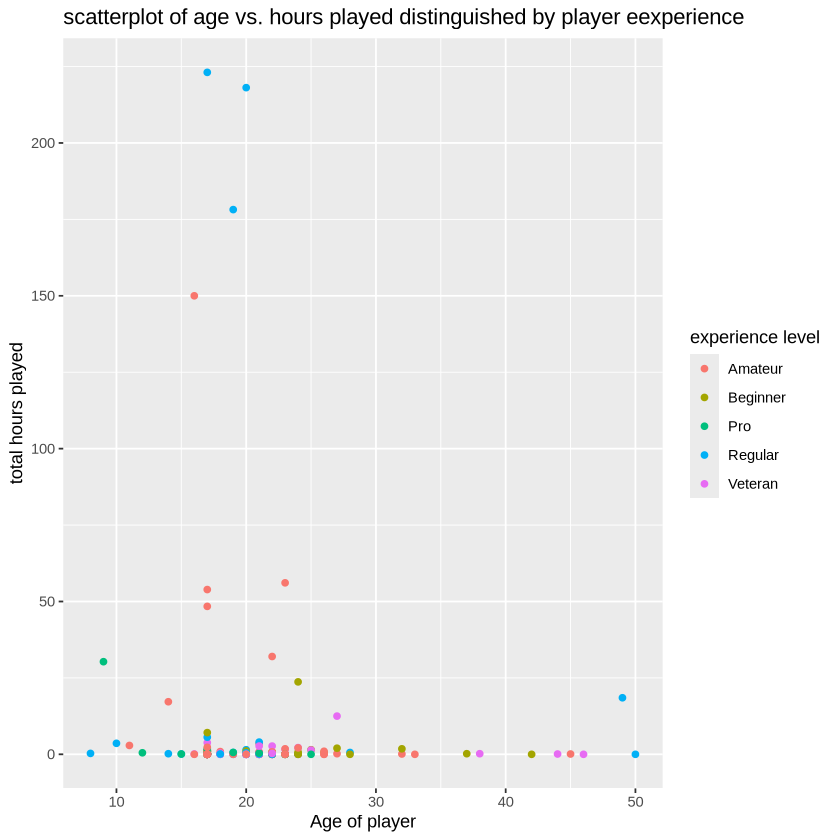

In [27]:
#scatterplot of age vs. hours played distinguished by player eexperience
age_vs_hours_played <- players_data |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) + 
    geom_point() + 
    labs(title = "scatterplot of age vs. hours played distinguished by player eexperience", x = "Age of player", y = "total hours played", colour = "experience level")
age_vs_hours_played
#shows the relationship between age and hours played between experience levels

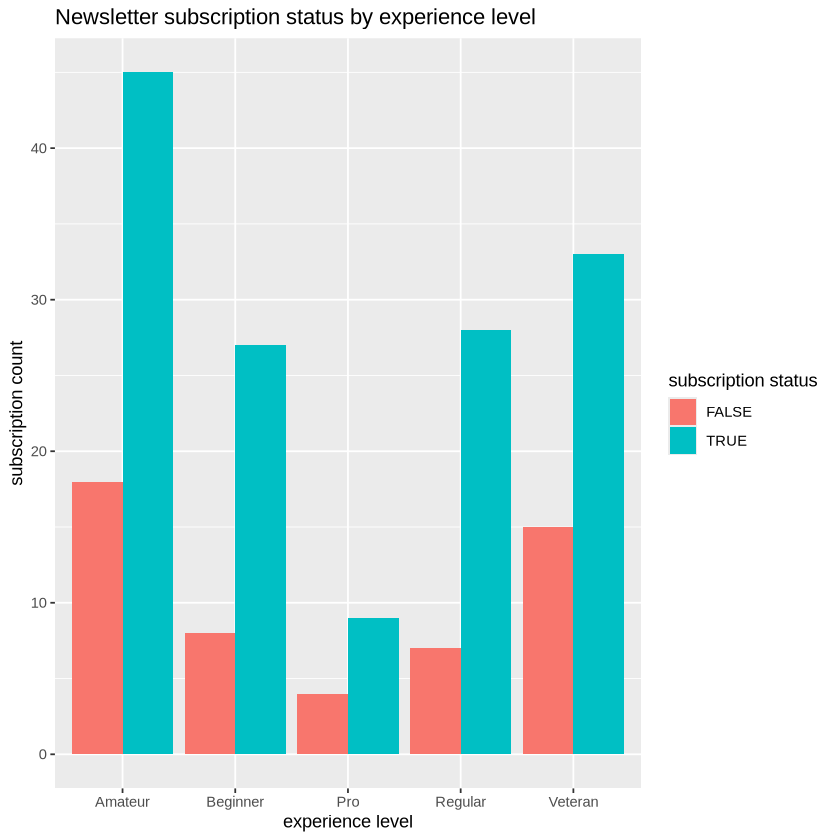

In [11]:
#experience vs. newsletter subscription as bar graph
experience_vs_subscription_bar <- players_data |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Newsletter subscription status by experience level", x = "experience level", y = "subscription count", fill = "subscription status")
experience_vs_subscription_bar
#this graph shows us which experience levels have more subscriptions.


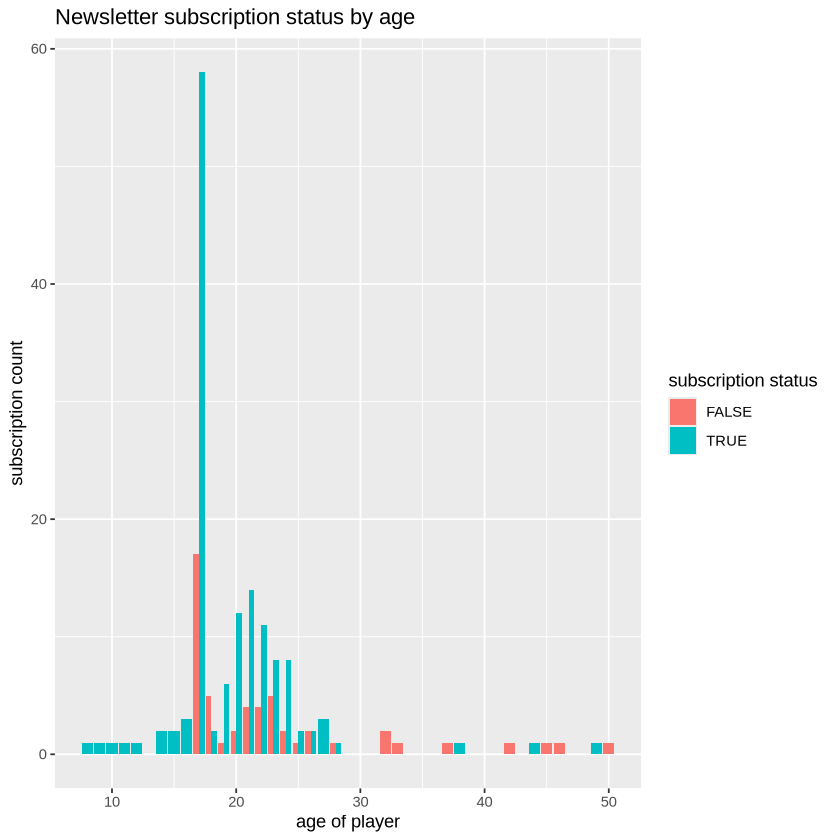

In [12]:
#age vs. newsletter subscription as bar graph
age_vs_subscription_bar <- players_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Newsletter subscription status by age", x = "age of player", y = "subscription count", fill = "subscription status")
age_vs_subscription_bar
#this graph shows us that the majority of players subscribed are around ages 15-25

In [28]:
#the experience level will be converted to a number for the classification model using mutate
players_numeric <- players_data |>
    mutate(experience_numeric = case_when(
        experience == "Beginner" ~ 1,
        experience == "Amateur" ~ 2,
        experience == "Regular" ~ 3,
        experience == "Veteran" ~ 4,
        experience == "Pro" ~ 5,
        TRUE ~ NA_real_))
head(players_numeric)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,experience_numeric
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,5
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,4
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,4
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,2
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,3
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,2
